# PROJECT: Test a Perceptual Phenomenon - Stroop Effect
***

## Introduction
The Stroop effect is a classic result of experimental psychology. In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed, for example:
#### <font color='red'>RED</font>, <font color='blue'>BLUE</font>, <font color='green'>GREEN</font>
In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed, for example:
#### <font color='purple'>YELLOW</font>, <font color='green'>ORANGE</font>,  <font color='red'>BLUE</font>
In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

The aim of this project is to investigate the supplied Stroop-test dataset, use descriptive statistics and a statistical test to analyze the Stroop effect, and use statistical inference to draw a conclusion based on the results. 

## Dataset

In [1]:
# Set up our environment by importing the necessary libraries

import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load our dataset
stroop_df=pd.read_csv('stroopdata.csv')
print(str(len(stroop_df))+' records loaded.')

24 records loaded.


In [3]:
stroop_df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


## Investigation

### 1. What is our independent variable? What is our dependent variable?

The *independent variable* in this test is the congruency of the displayed text. In other words, whether the text is congurent (ink colour matches word) or whether the text is incongruent (ink colour does not match word). This is the variable we change.

The *dependent variable* in this test is the time it takes to name the ink colour of the displayed text. This is the variable we measure.

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

The supplied dataset contains the response times for the same group of participants under two different conditions. This is a *repeated measures* design. An appropriate set of hypotheses for this task are as follows:

If we write the mean difference as
$$\mu_D = \mu_I - \mu_C$$
then

**NULL HYPOTHESIS, H<sub>0</sub>** - There is no significant difference in the measured response times between the incongruent test and the congruent test:

$$\mu_D = 0$$

**ALTERNATE HYPOTHESIS, H<sub>A</sub>** - There is a significant difference in the measured response times between the incongruent test and the congruent test:

$$\mu_D \neq 0$$

We do not know the population parameters, but we know the  sample size is less than 30 (*n*=24). We also assume the following:
- The data is normally distributed.
- The sample is representative of the population 

It is for these reasons we will perform a dependent two-tailed t-test for paired samples.

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In accordance with our hypothesis, we calculate the differences:

In [4]:
stroop_df['Difference']=stroop_df['Incongruent']-stroop_df['Congruent']

In [5]:
# Descriptive statistics
stroop_df.describe().transpose().round(3)

,count,mean,std,min,25%,50%,75%,max
Congruent,24.0,14.051,3.559,8.630,11.895,14.356,16.201,22.328
Incongruent,24.0,22.016,4.797,15.687,18.717,21.018,24.052,35.255
Difference,24.0,7.965,4.865,1.950,3.646,7.666,10.259,21.919


### Central Tendency

Sample Means, $\bar x$:
\begin{align}
\bar x_C &= 14.051 \\
\bar x_I &= 22.016 \\
\bar x_D &= 7.965
\end{align}

### Variability

Sample Standard Deviations, S:
\begin{align}
S_C &= 3.559 \\
S_I &= 4.797 \\
S_D &= 4.865
\end{align}

### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

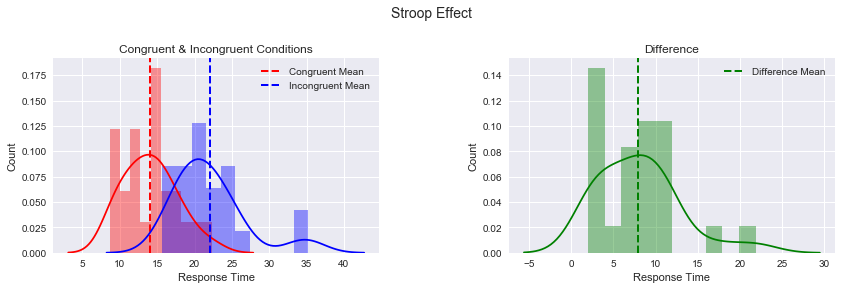

In [6]:
# Create side-by-side plot of frequency distributions
plt.figure(figsize=(14,4))
plt.suptitle('Stroop Effect',fontsize=14)
# Left plot
plt.subplot(1,2,1)
sns.distplot(stroop_df['Congruent'],bins=10,color='red')
plt.axvline(stroop_df['Congruent'].mean(),color='r',linestyle='--',
            linewidth=2,label='Congruent Mean')
sns.distplot(stroop_df['Incongruent'],bins=10,color='blue')
plt.axvline(stroop_df['Incongruent'].mean(),color='b',linestyle='--',
            linewidth=2,label='Incongruent Mean')
plt.title('Congruent & Incongruent Conditions')
plt.ylabel('Count')
plt.xlabel('Response Time')
plt.legend()
# Right plot
plt.subplot(1,2,2)
sns.distplot(stroop_df['Difference'],bins=10,color='green')
plt.axvline(stroop_df['Difference'].mean(),color='g',linestyle='--',
            linewidth=2,label='Difference Mean')
plt.title('Difference')
plt.ylabel('Count')
plt.xlabel('Response Time')
plt.legend()
plt.subplots_adjust(wspace=0.4,top=0.8)
plt.show()

It is evident from the above plots that the test with the incongruent condition was more difficult than the test with the congruent condition, resulting in larger response times. The overall distributions are relatively normal, with outliers in the incongruent data at around 35 seconds.

### 5. Perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [7]:
# Two-tailed t-test
t_stat,p_val=stats.ttest_rel(stroop_df['Incongruent'],stroop_df['Congruent'],axis=0)
print 't-statistic: ',round(t_stat,3),'\np-value:',p_val

t-statistic:  8.021 
p-value: 4.10300058571e-08


If we assume a confidence level of 95% ($\alpha = 0.05$):

In [8]:
alpha=0.05
dof=len(stroop_df)-1
t_crit=abs((stats.t.ppf((alpha/2),dof)))
print 't-critical:', round(t_crit,3)

t-critical: 2.069


The t-statistic (8.021) is much greater than t-critical (2.069) which clearly places it in the critical region. The calculated p-value (4.103e-08) means the probability that the difference is due to random chance is practically zero.

We reject the null hypothesis, since the results are statistically significant. In conclusion we can say that it is more difficult to determine the ink colours for the incongruent condition since there is an added element of confusion. This is shown by the increased response times, which is what we would expect.